In [6]:
import pandas as pd 

DATA_PATH = r'C:\Users\hp\Downloads/datadatabricks.csv'
# Load the CSV file into a DataFrame
df = pd.read_csv(DATA_PATH)

# Display the first few rows
print(df.head())

   variant_id checkout_completed_at  total_demand  stockout_occurred  row_num  \
0       13316            2024-01-04             4                  0        1   
1       13316            2024-01-15             4                  0        2   
2       13331            2024-08-29             2                  0        2   
3       13339            2024-11-29             6                  0        4   
4       13344            2024-02-10             6                  0        1   

   demand_7day_avg  stockout_risk_target  day_of_week  month   GRP  \
0              NaN                   0.0            5      1  FOOD   
1              4.0                   0.0            2      1  FOOD   
2              2.0                   0.0            5      8  FOOD   
3              4.0                   NaN            6     11  FOOD   
4              NaN                   0.0            7      2  FOOD   

             DEP          RAY  store_id SAISONNALITE_ARTICLE  
0  PRODUIT FRAIS     CREMERIE

### distribition 

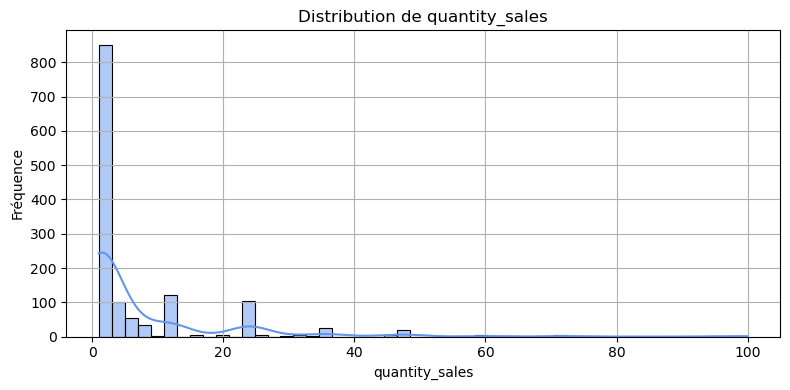

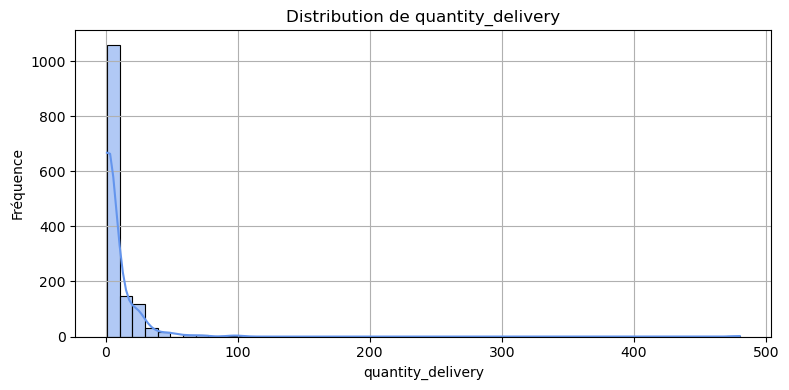

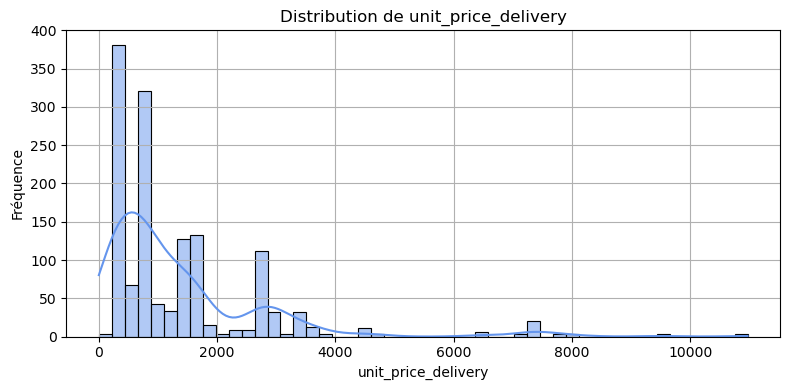

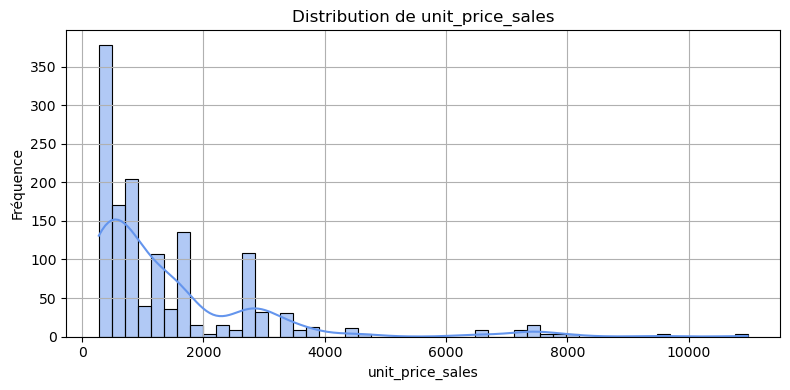

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des variables numériques à visualiser
numerical_cols = ["quantity_sales", "quantity_delivery", "unit_price_delivery", "unit_price_sales"]

# Histogramme pour chaque variable
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=50, kde=True, color="cornflowerblue")
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.grid(True)
    plt.tight_layout()
    plt.show()






## 🧠 General Summary

| Variable              | Distribution Shape      | Recommended Method         |
| --------------------- | ----------------------- | -------------------------- |
| `quantity_sales`      | Highly right-skewed     | ✅ IQR                      |
| `quantity_delivery`   | Strong right skew       | ✅ IQR, optional log        |
| `unit_price_delivery` | Skewed, long right tail | ✅ IQR, ⚠️ possible Z-score |
| `unit_price_sales`    | Skewed, long right tail | ✅ IQR, ⚠️ possible Z-score |



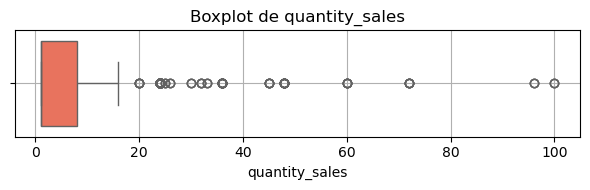

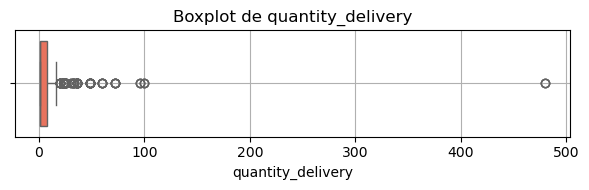

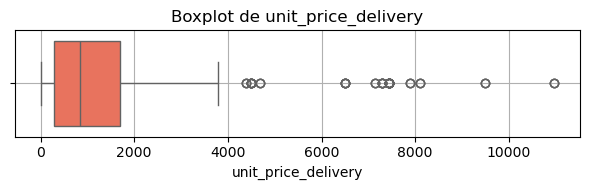

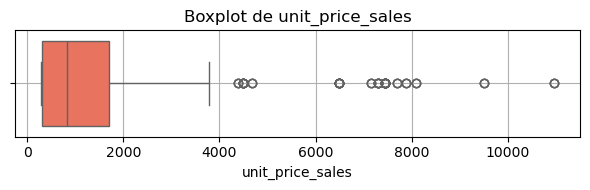

In [15]:
for col in numerical_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col], color="tomato")
    plt.title(f"Boxplot de {col}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()




## ✅ **Conclusion générale (à inclure dans ton rapport)**

> Les quatre variables quantitatives présentent une **forte asymétrie positive**, caractérisée par une concentration de valeurs faibles et la présence de nombreuses valeurs extrêmes.
> Les **boxplots confirment la présence de valeurs aberrantes** (outliers) selon la définition classique basée sur l'IQR (Interquartile Range).
> La détection et le traitement de ces outliers seront essentiels pour améliorer la qualité des modèles de prédiction.



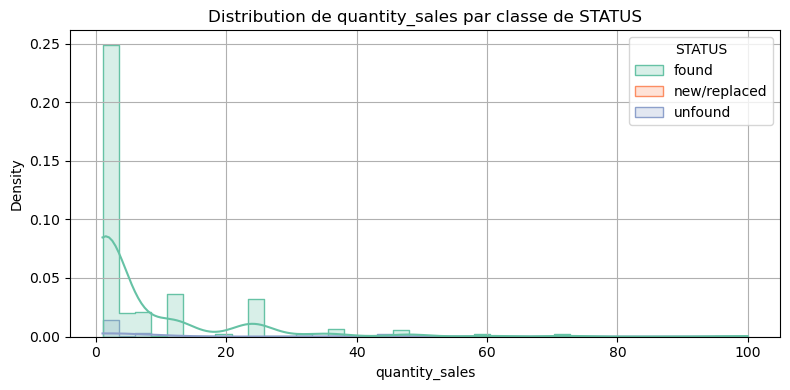

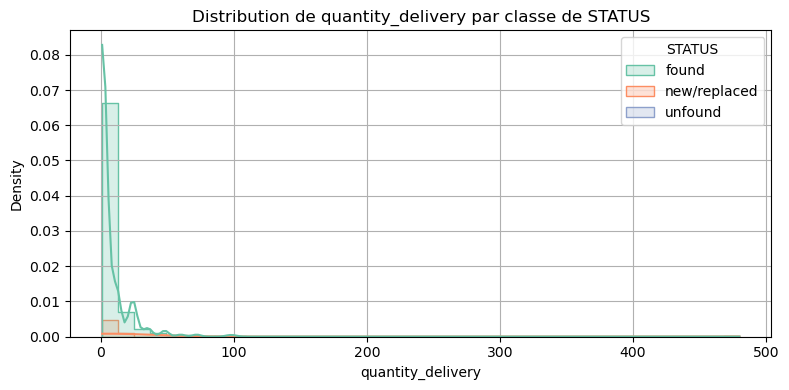

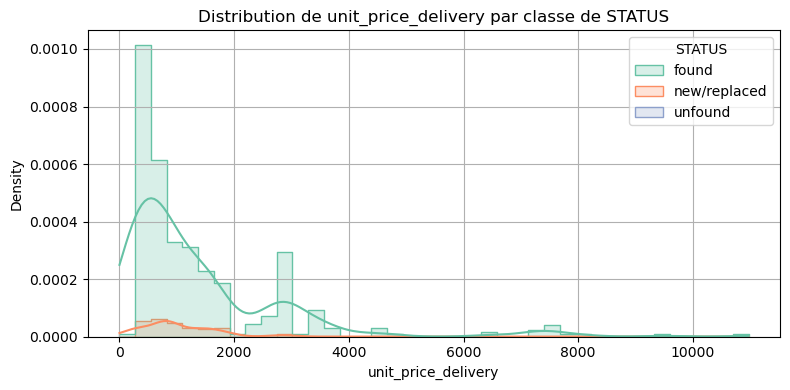

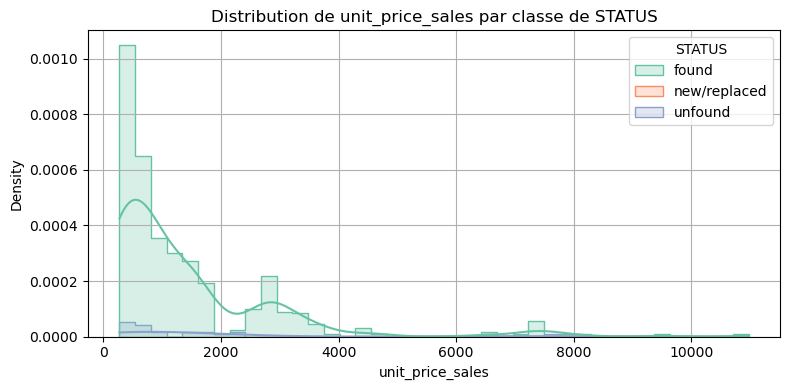

In [17]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue="STATUS", bins=40, kde=True, palette="Set2", element="step", stat="density")
    plt.title(f"Distribution de {col} par classe de STATUS")
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
